In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [ ]:
DATA_DIR = r"D:\Desktop\PyVerse\Machine_Learning\Health_Classifcation\mental_health"

# Read CSV files
Train_data = pd.read_csv(os.path.join(DATA_DIR, "Train_Data.csv"))
Test_data  = pd.read_csv(os.path.join(DATA_DIR, "Test_Data.csv"))


In [3]:
Train_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


lets EDA


In [4]:

Test_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [5]:
Train_data.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [6]:
Test_data.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

In [7]:

Train_data.drop(columns=['ID1', 'ID2'], inplace=True)
Test_data.drop(columns=['ID1', 'ID2'], inplace=True)

In [8]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Specific ailments          25920 non-null  int64  
 1   Food preference            25910 non-null  object 
 2   Age                        25920 non-null  int64  
 3   BMI                        25920 non-null  float64
 4   Smoker?                    25920 non-null  object 
 5   Living in?                 25920 non-null  object 
 6   Any heriditary condition?  25920 non-null  object 
 7   Follow Diet                24947 non-null  float64
 8   Physical activity          24947 non-null  float64
 9   Regular sleeping hours     24947 non-null  float64
 10  Alcohol consumption        24947 non-null  float64
 11  Social interaction         24947 non-null  float64
 12  Taking supplements         24947 non-null  float64
 13  Mental health management   24947 non-null  flo

In [9]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Specific ailments          6480 non-null   int64  
 1   Food preference            6477 non-null   object 
 2   Age                        6480 non-null   int64  
 3   BMI                        6480 non-null   float64
 4   Smoker?                    6480 non-null   object 
 5   Living in?                 6480 non-null   object 
 6   Any heriditary condition?  6480 non-null   object 
 7   Follow Diet                6218 non-null   float64
 8   Physical activity          6218 non-null   float64
 9   Regular sleeping hours     6218 non-null   float64
 10  Alcohol consumption        6218 non-null   float64
 11  Social interaction         6218 non-null   float64
 12  Taking supplements         6218 non-null   float64
 13  Mental health management   6218 non-null   float

In [10]:
# After line 608, add:
print(f"Found {Train_data.duplicated().sum()} duplicate rows")


Found 74 duplicate rows


In [11]:
# Remove duplicates keeping first occurrence
Train_data = Train_data.drop_duplicates(keep='first')
print(f"Shape after removing duplicates: {Train_data.shape}")

Shape after removing duplicates: (25846, 16)


In [12]:
numerical_col=Train_data.select_dtypes(include="number").columns.tolist()
numerical_col

['Specific ailments',
 'Age',
 'BMI',
 'Follow Diet',
 'Physical activity',
 'Regular sleeping hours',
 'Alcohol consumption',
 'Social interaction',
 'Taking supplements',
 'Mental health management',
 'Illness count last year',
 'Healthy']

In [13]:
# filling null numerical value in train data
for n_c in numerical_col:
    if Train_data[n_c].isnull().sum()>0:
        Train_data[n_c] = Train_data[n_c].fillna(Train_data[n_c].median())
    
for n_c in numerical_col:
    print(Train_data[n_c].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [14]:
# filling null numerical value in test data
numerical_col=Test_data.select_dtypes(include="number").columns.tolist()
numerical_col

for n_c in numerical_col:
    if Test_data[n_c].isnull().sum()>0:
        Test_data[n_c]=Test_data[n_c].fillna(Test_data[n_c].median())
    
for n_c in numerical_col:
    print(Test_data[n_c].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0


In [15]:
# lets work on food preference
Train_data.dropna(subset=['Food preference'],inplace=True)
Test_data.dropna(subset=['Food preference'],inplace=True)

In [16]:
print(Train_data['Any heriditary condition?'].value_counts())
print(Test_data['Any heriditary condition?'].value_counts())

Any heriditary condition?
Stable    25836
Name: count, dtype: int64
Any heriditary condition?
Stable    6477
Name: count, dtype: int64


In [17]:
#only one hariditary condition remove this column also
Train_data.drop(columns=['Any heriditary condition?'],inplace=True)
Test_data.drop(columns=['Any heriditary condition?'],inplace=True)

In [18]:
# Lets see mental Mental health management
Train_data['Mental health management'].value_counts()

Mental health management
0.0    25836
Name: count, dtype: int64

In [19]:
# Only one type of value in Mental health managemeent remove it
Train_data.drop(columns=['Mental health management'],inplace=True)
Test_data.drop(columns=['Mental health management'],inplace=True)

In [20]:
Train_data['Illness count last year'].value_counts()

Illness count last year
2.0    11282
1.0    10603
3.0     3468
4.0      448
5.0       35
Name: count, dtype: int64

In [21]:
Train_data.isnull().sum()

Specific ailments          0
Food preference            0
Age                        0
BMI                        0
Smoker?                    0
Living in?                 0
Follow Diet                0
Physical activity          0
Regular sleeping hours     0
Alcohol consumption        0
Social interaction         0
Taking supplements         0
Illness count last year    0
Healthy                    0
dtype: int64

In [22]:
Test_data.isnull().sum()

Specific ailments          0
Food preference            0
Age                        0
BMI                        0
Smoker?                    0
Living in?                 0
Follow Diet                0
Physical activity          0
Regular sleeping hours     0
Alcohol consumption        0
Social interaction         0
Taking supplements         0
Illness count last year    0
dtype: int64

In [23]:
Train_data['Healthy'].value_counts()

Healthy
1    16249
0     9587
Name: count, dtype: int64

In [24]:
# wee saw all missing value and the outlliers are handled lets see its panda profiling
from ydata_profiling import ProfileReport
report=ProfileReport(Train_data)
report.to_file('health1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 158.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
X_train=Train_data.iloc[:, :-1]
Y_train=Train_data['Healthy']
X_train.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Illness count last year
0,44,DX6,49,20.500470,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,39,DX3 DX4,20,26.076580,NO,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,29,DX6,1,21.420866,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27,DX1,30,25.203247,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9,DX6,40,19.355846,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0


In [26]:
print(Y_train.head())
print(Y_train.tail())

0    1
1    1
2    0
3    1
4    1
Name: Healthy, dtype: int64
25915    1
25916    0
25917    1
25918    1
25919    1
Name: Healthy, dtype: int64


In [27]:
#Now outliers is handeled
# lets start modeling
X_test=Test_data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(25836, 13)
(6477, 13)
(25836,)


In [28]:
cat_col=X_train.select_dtypes(exclude='number').columns
cat_col

Index(['Food preference', 'Smoker?', 'Living in?'], dtype='object')

In [29]:
# lets start firstly do encod categorical data
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False)

oft=OrdinalEncoder(categories=[['NO','YES']])
ol=OrdinalEncoder(categories=[['RURAL','URBAN']])
le=LabelEncoder()


In [30]:
from sklearn.compose import ColumnTransformer

TF=ColumnTransformer(
    transformers=[
        
        ('tnf1',ohe,['Food preference']),
        ('tnf6',oft,['Smoker?']),
        ('fnf11',ol,['Living in?']),
        
    ],remainder='passthrough'

)


In [31]:
from imblearn.over_sampling import SMOTEN
bala=SMOTEN()

In [32]:
# Lets use XGboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



In [33]:
model = XGBClassifier()            

from imblearn.pipeline import Pipeline
pipe=Pipeline(steps=[
    ('tnf1',TF),
    ('balance',bala),
    ('model',model)
])

In [34]:
param_grid = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [100, 200,300,400],
        'model__max_depth': [5, 10]
    },
    {
        'model': [AdaBoostClassifier()],

    },
    {
        'model':[XGBClassifier()],
        'model__max_depth':[5,10],
        'model__learning_rate':[0.01,0.1]
    }
]



In [35]:
# 3️⃣ GridSearchCV
from sklearn.model_selection import GridSearchCV
final = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
final.fit(X_train, Y_train)

print("Best params:", final.best_params_)
print("Best CV score from GridSearch:", final.best_score_)


Best params: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...), 'model__learning_rate': 0.1, 'model__max_depth': 5}
Best CV score from GridSearch: 0.8227280877514543


In [36]:
y_pred=final.predict(X_test)
y_pred

# Validate predictions
assert len(y_pred) == len(X_test), "Prediction length mismatch"
assert set(y_pred).issubset({0, 1}), "Invalid prediction values"

# Save predictions
import pandas as pd
predictions_df = pd.DataFrame({
    'index': range(len(y_pred)),
    'prediction': y_pred,
    'health_status': ['Unhealthy' if p == 0 else 'Healthy' for p in y_pred]
})
predictions_df.to_csv('test_predictions.csv', index=False)
print(f"Predictions saved to test_predictions.csv")
print(f"Prediction distribution: {pd.Series(y_pred).value_counts()}")

Predictions saved to test_predictions.csv
Prediction distribution: 1    3757
0    2720
Name: count, dtype: int64


In [37]:
from sklearn.model_selection import cross_val_score
best_model = final.best_estimator_
cv_scores = cross_val_score(best_model, X_train, Y_train, cv=5, scoring='accuracy')
print("Extra CV scores:", cv_scores)
print("Extra CV mean accuracy:", cv_scores.mean())

Extra CV scores: [0.81830495 0.81420554 0.82233404 0.82581769 0.81710857]
Extra CV mean accuracy: 0.8195541588947721



=== Classification Report ===
              precision    recall  f1-score   support

   Unhealthy       0.74      0.79      0.76      1918
     Healthy       0.87      0.83      0.85      3250

    accuracy                           0.82      5168
   macro avg       0.80      0.81      0.81      5168
weighted avg       0.82      0.82      0.82      5168


=== Confusion Matrix ===
[[1516  402]
 [ 546 2704]]


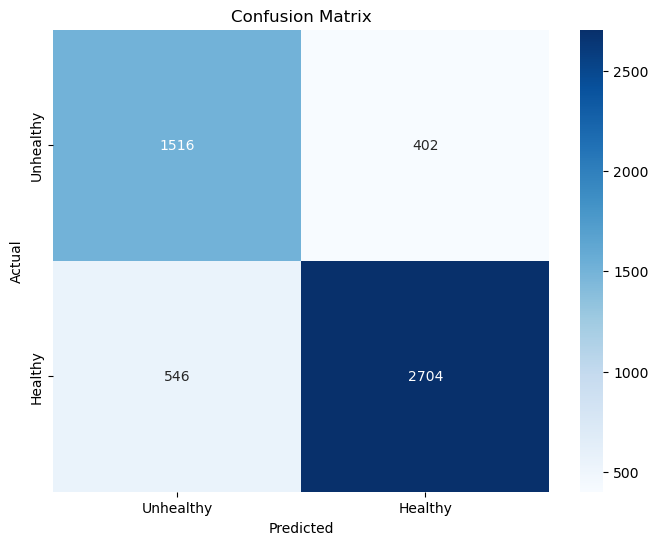

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create a validation split for detailed evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

# Train on split and evaluate
final.fit(X_train_split, y_train_split)
y_val_pred = final.predict(X_val_split)

# Detailed metrics
print("\n=== Classification Report ===")
print(classification_report(y_val_split, y_val_pred, 
                          target_names=['Unhealthy', 'Healthy']))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_val_split, y_val_pred)
print(cm)

# Visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
import joblib
joblib.dump(best_model, "health_model.pkl")

['health_model.pkl']